In [106]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [107]:
# read data from csv file and convert it to array
def readCSV(path):
    list = []

    with open(path, newline='', encoding='UTF-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')    
        for row in reader:
            list.append(row)

    return np.asarray(list)

data = readCSV('wikilympics2016.csv')

In [108]:
# create random integers between 8000 and 12000 and append column 'length' to data
# length = np.random.randint(8000, 12000, size=len(data)).reshape(len(data), 1)
# data = np.hstack((data, length))

In [109]:
# split data into 8 different arrays
athletes = data[np.where(data[:, 1] == 'Athletes (track and field)')]
equestrians = data[np.where(data[:, 1] == 'Equestrians')]
archers = data[np.where(data[:, 1] == 'Archers')]
fencers = data[np.where(data[:, 1] == 'Fencers')]
divers = data[np.where(data[:, 1] == 'Divers')]
pentathletes = data[np.where(data[:, 1] == 'Modern pentathletes')]
swimmers = data[np.where(data[:, 1] == 'Swimmers')]
cyclists = data[np.where(data[:, 1] == 'Cyclists')]
canoeists = data[np.where(data[:, 1] == 'Canoeists')]
gymnasts = data[np.where(data[:, 1] == 'Gymnasts')]
rowers = data[np.where(data[:, 1] == 'Rowers')]

In [110]:
def plot_means(y):
    x = range(len(y))
    labels = ["Men", "Women"]
    width = 1/2
    plt.bar(x, y, width, color="blue")
    plt.xticks(x, labels)

In [111]:
def plot_median(y):
    x = range(len(y))
    labels = ["Men", "Women"]
    width = 1/2
    plt.bar(x, y, width, color="red")
    plt.xticks(x, labels)

In [112]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    # get length of wikipedia articles for groups of male and female athletes
    men = sportart[np.where(sportart[:, 3] == 'm')][:, k].astype(np.int)
    women = sportart[np.where(sportart[:, 3] == 'f')][:, k].astype(np.int)
    
    print(kategorie)
    print(str(len(men))+" men, mean: "+str(np.mean(men))+", median: "+str(np.median(men)))
    print(str(len(women))+" women, mean: "+str(np.mean(women))+", median: "+str(np.median(women)))

    y = [np.mean(men), np.mean(women)]    
    
    plot_means([np.mean(men), np.mean(women)])
    plot_median([np.median(men),np.median(women)])
    
    # conduct t test
    return stats.ttest_ind(men, women)

words
501 men, mean: 248.77844311377245, median: 68.0
439 women, mean: 238.00683371298405, median: 90.0


Ttest_indResult(statistic=0.3267815025214915, pvalue=0.7439060541742573)

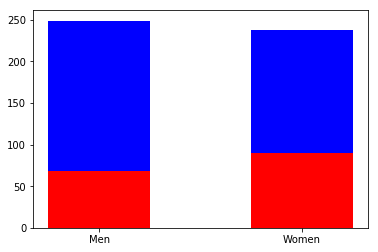

In [113]:
ttest(swimmers,'words') # words,edits,links

In [114]:
def intify(stringseries):
    list = []
    for row in stringseries:
        list.append(int(row))
    
    return pd.Series(list)

In [115]:
def createDataFrame(data):
    indices = []
    dataWithoutIndices = []
    for lines in data[1:]:
        indices.append(lines[0])
        dataWithoutIndices.append(lines[1:])

    return pd.DataFrame(data=dataWithoutIndices, columns=data[0][1:])

In [116]:
# Turn all strings that should be int into int
allpeople = createDataFrame(data)
allpeople.Wordcount = intify(allpeople.Wordcount)
allpeople.Editcount = intify(allpeople.Editcount)
allpeople.Linkcount = intify(allpeople.Linkcount)

In [117]:
allmen = allpeople.loc[allpeople['Gender'] == 'm']
allwomen = allpeople.loc[allpeople['Gender'] == 'f']
unassigned = allpeople.loc[allpeople['Gender'] == '0']

print('Women: ' + str(len(allwomen)) + ' Men: ' +str(len(allmen)) +' Unassigned: ' + str(len(unassigned)))

Women: 4547 Men: 5491 Unassigned: 266


In [118]:
#Extreme values on wordcount column
def extremes_per_sport(data, gender):
    sports = data.Sport.unique()
    cols = ['Max', 'Min']
    max = []
    min = []
    gendered_dataFrame = data.loc[data['Gender'] == gender]
    for sport in sports:
        max.append(gendered_dataFrame.loc[gendered_dataFrame['Sport'] == sport].Wordcount.max())
        min.append(gendered_dataFrame.loc[gendered_dataFrame['Sport'] == sport].Wordcount.min())
    return pd.DataFrame({'Max':np.asarray(max),
                        'Min': np.asarray(min)}, index=sports)

In [119]:
def plot_max(data, gender):
    labels = data.Sport.unique()
    y_pos = np.arange(len(labels))
    performance = np.asarray(extremes_per_sport(data, gender).Max)
 
    plt.barh(y_pos, performance, align='center', alpha=0.5, color='green')
    plt.yticks(y_pos, labels)
    plt.xlabel('Wordcount')
    plt.title('Max Wordcount')
 
    plt.show()

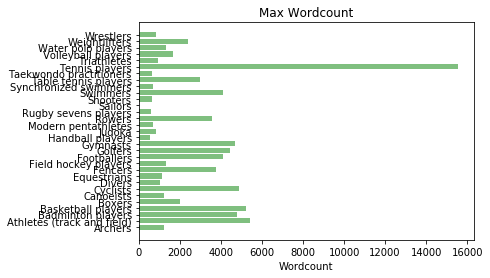

In [120]:
plot_max(allpeople, 'f')

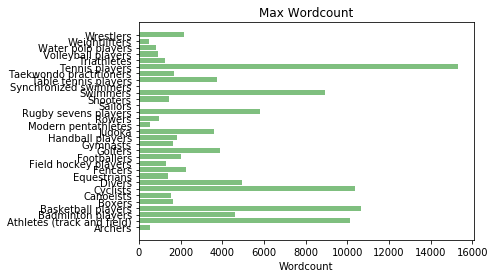

In [121]:
plot_max(allpeople, 'm')

In [122]:
def plot_min(data, gender):
    labels = data.Sport.unique()
    y_pos = np.arange(len(labels))
    performance = np.asarray(extremes_per_sport(data, gender).Min) 
    plt.barh(y_pos, performance, align='center', alpha=0.5, color='green')
    plt.yticks(y_pos, labels)
    plt.xlabel('Wordcount')
    plt.title('Min Wordcount')
 
    plt.show()

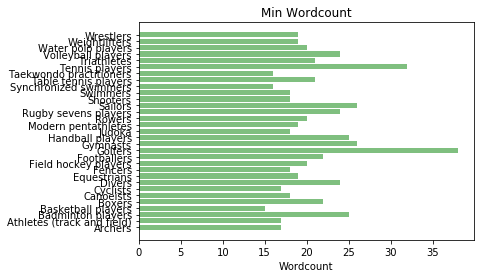

In [123]:
plot_min(allpeople, 'f')

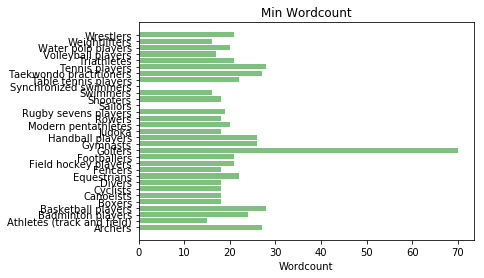

In [124]:
plot_min(allpeople, 'm')

In [131]:
# takes a pandas series (one column of a pandas dataFrame)
def histogram(data):
    num_bins = 8
    n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
    plt.show()

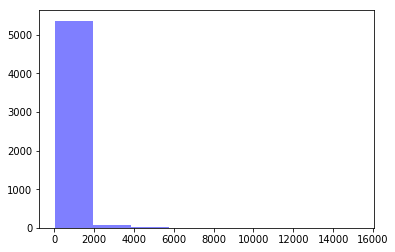

In [132]:
histogram(allpeople.loc[allpeople['Gender'] == 'm'].Wordcount)

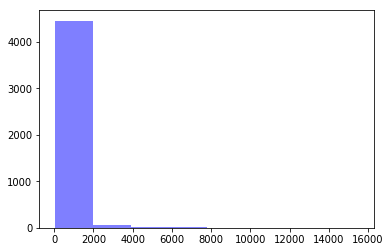

In [133]:
histogram(allpeople.loc[allpeople['Gender'] == 'f'].Wordcount)

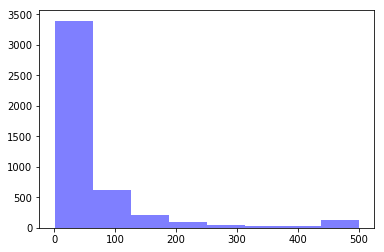

In [134]:
histogram(allpeople.loc[allpeople['Gender'] == 'f'].Editcount)

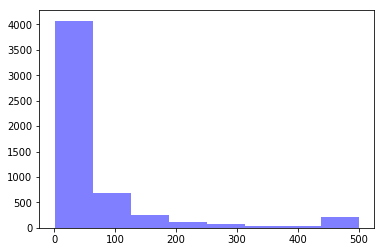

In [135]:
histogram(allpeople.loc[allpeople['Gender'] == 'm'].Editcount)

In [143]:
#Number of ppl of specified gender per sport
def gender_per_sport(data):
    sports = data.Sport.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'f']
    allmen = data.loc[data['Gender'] == 'm']
    for sport in sports:
        amount_of_women = len(allwomen.loc[allwomen['Sport'] == sport])
        amount_of_men = len(allmen.loc[allmen['Sport'] == sport])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=sports)

In [147]:
per_sport = gender_per_sport(allpeople)
#Male and female athletes per sport, where there are equal numbers of participants
per_sport.loc[per_sport['equal'] == 'true']

,f,m,equal
Archers,64,64,true
Rugby sevens players,148,148,true
Table tennis players,84,84,true
